# Import libs

In [1]:
import sys, os
if not sys.path[0] == os.path.abspath('..'):
    sys.path.insert(0, os.path.abspath('..'))

import pandas as pd
import numpy as np
from models.knn.knn import knn
from models.dmc.dmc import dmc
from models.bayes_classifier.bayes_classifier import bayes_classifier
from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
from utils.functions import confusion_matrix, confusion_matrix_mean
from matplotlib import pyplot as plt

# Loading Dermatology dataset

In [2]:
Xy = pd.read_csv('../datasets/dermatology.csv')

X = Xy.drop(['class'], axis=1)
y = Xy['class']

# Running the tests and computing informations

In [3]:
realizations = 20
knn_hit_rate_list = []
dmc_hit_rate_list = []
b_hit_rate_list = []
knn_std_dev = 0
dmc_std_dev = 0
b_std_dev = 0
knn_confusion_matrix_list = []
dmc_confusion_matrix_list = []
b_confusion_matrix_list = []

for r in range(realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    knn_model = knn(k=3, type_distance_calc='euclidean')
    knn_model.fit(X_train, y_train)

    dmc_model = dmc(type_distance_calc='euclidean')
    dmc_model.fit(X_train, y_train)

    b_model = bayes_classifier()
    b_model.fit(X_train, y_train)

    knn_hit_rate_list.append(knn_model.score(X_test, y_test))
    dmc_hit_rate_list.append(dmc_model.score(X_test, y_test))
    b_hit_rate_list.append(b_model.score(X_test, y_test))

    knn_y_pred = [knn_model.predict(x) for x in X_test.values]
    dmc_y_pred = [dmc_model.predict(x) for x in X_test.values]
    b_y_pred = [b_model.predict(x) for x in X_test.values]

    knn_confusion_matrix_list.append(confusion_matrix(y_test, knn_y_pred))
    dmc_confusion_matrix_list.append(confusion_matrix(y_test, dmc_y_pred))
    b_confusion_matrix_list.append(confusion_matrix(y_test, b_y_pred))

knn_std_dev = np.std(knn_hit_rate_list)
dmc_std_dev = np.std(dmc_hit_rate_list)
b_std_dev = np.std(b_hit_rate_list)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a

# Showing knn informations computed

In [4]:
print('----------------- KNN model -----------------')
print('Hit rate:')
print(knn_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(knn_hit_rate_list)/len(knn_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(knn_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in knn_confusion_matrix_list:
    print(matrix, end='\n')

----------------- KNN model -----------------
Hit rate:
[0.9324324324324325, 0.8783783783783784, 0.9054054054054054, 0.9054054054054054, 0.8513513513513513, 0.8918918918918919, 0.918918918918919, 0.8378378378378378, 0.8783783783783784, 0.8243243243243243, 0.8918918918918919, 0.9459459459459459, 0.8648648648648649, 0.8108108108108109, 0.9054054054054054, 0.8378378378378378, 0.8648648648648649, 0.8648648648648649, 0.9054054054054054, 0.8648648648648649]

Accuracy:
0.879054054054054

Standard Deviation:
0.03510263569692037

Confusion Matrix:
    3  5   1  2  6  4
3  18  0   0  0  0  0
5   0  7   0  0  0  1
1   0  0  23  0  0  0
2   0  0   0  8  0  2
6   0  0   0  1  6  0
4   0  0   0  1  0  7
   2   1   3   5   4  6
2  8   0   0   1   4  0
1  0  20   0   0   0  1
3  0   0  12   0   0  0
5  0   0   0  11   1  0
4  1   1   0   0  13  0
6  0   0   0   0   0  1
    1   2  6  5   4   3
1  23   1  1  0   1   0
2   0  11  0  2   1   0
6   0   0  2  0   0   0
5   0   0  0  8   0   0
4   0   0  0 

In [5]:
confusion_matrix_mean(knn_confusion_matrix_list)

,3,5,1,2,6,4
3,15,0,0,0,0,0
5,0,9,0,0,0,0
1,0,0,21,0,0,0
2,0,0,0,7,0,3
6,0,0,0,0,3,0
4,0,0,0,2,0,8


# Showing dmc informations computed

In [6]:
print('----------------- DMC model -----------------')
print('Hit rate:')
print(dmc_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(dmc_hit_rate_list)/len(dmc_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(dmc_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in dmc_confusion_matrix_list:
    print(matrix, end='\n')

----------------- DMC model -----------------
Hit rate:
[0.6756756756756757, 0.2702702702702703, 0.4864864864864865, 0.47297297297297297, 0.4864864864864865, 0.44594594594594594, 0.4189189189189189, 0.4864864864864865, 0.527027027027027, 0.527027027027027, 0.5135135135135135, 0.5135135135135135, 0.5405405405405406, 0.5, 0.581081081081081, 0.47297297297297297, 0.527027027027027, 0.5135135135135135, 0.5135135135135135, 0.581081081081081]

Accuracy:
0.5027027027027027

Standard Deviation:
0.07506996979638458

Confusion Matrix:
    3  5   1  2  6  4
3  14  0   0  4  0  0
5   3  3   1  0  1  0
1   0  1  18  3  1  0
2   3  0   1  6  0  0
6   0  0   0  0  7  0
4   2  0   0  3  1  2
   2  1  3  5  4  6
2  2  0  4  0  6  1
1  0  6  9  0  2  4
3  0  0  4  0  8  0
5  0  0  5  3  2  2
4  2  0  7  0  4  2
6  0  0  0  0  0  1
    1  2  6  5  4   3
1  14  4  3  0  5   0
2   3  3  2  1  0   5
6   0  0  2  0  0   0
5   1  0  2  2  3   0
4   0  0  1  1  5   4
3   0  0  0  0  3  10
    1  6  5   3  4  2


In [7]:
confusion_matrix_mean(dmc_confusion_matrix_list)

,3,5,1,2,6,4
3,10,0,0,1,0,2
5,1,3,2,0,1,1
1,1,1,12,1,3,2
2,2,0,2,2,2,1
6,0,0,0,0,3,0
4,2,0,1,1,1,3


# Showing bayes informations computed

In [8]:
print('----------------- BAYES model -----------------')
print('Hit rate:')
print(b_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(b_hit_rate_list)/len(b_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(b_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in b_confusion_matrix_list:
    print(matrix, end='\n')

----------------- BAYES model -----------------
Hit rate:
[0.9594594594594594, 0.918918918918919, 0.918918918918919, 0.8648648648648649, 0.9459459459459459, 0.8783783783783784, 0.8513513513513513, 0.972972972972973, 1.0, 0.8513513513513513, 0.9324324324324325, 0.9594594594594594, 0.8648648648648649, 0.8918918918918919, 0.8783783783783784, 0.8918918918918919, 0.918918918918919, 0.8513513513513513, 0.9459459459459459, 0.918918918918919]

Accuracy:
0.9108108108108108

Standard Deviation:
0.043243243243243246

Confusion Matrix:
    3  5   1  2  6  4
3  17  0   0  0  1  0
5   0  8   0  0  0  0
1   0  0  23  0  0  0
2   0  0   0  9  0  1
6   0  0   0  1  6  0
4   0  0   0  0  0  8
    2   1   3   5   4  6
2  10   1   0   0   2  0
1   0  21   0   0   0  0
3   0   0  12   0   0  0
5   0   0   0  12   0  0
4   1   0   0   0  13  1
6   1   0   0   0   0  0
    1   2  6  5   4   3
1  24   0  2  0   0   0
2   0  11  2  0   1   0
6   0   0  2  0   0   0
5   0   0  0  8   0   0
4   0   0  0  0  11  

In [9]:
confusion_matrix_mean(b_confusion_matrix_list)

,3,5,1,2,6,4
3,14,0,0,0,0,0
5,0,9,0,0,0,0
1,0,0,21,0,0,0
2,0,0,0,9,0,1
6,0,0,0,0,1,0
4,0,0,0,0,0,10


# Choosing two columns from the last X_train and X_test to plot decision surface

In [10]:
X_train_2d, X_test_2d = X_train[['erythema', 'scaling']], X_test[['erythema', 'scaling']]

print('Train dataset:')
print(X_train_2d)
print('Test dataset:')
print(X_test_2d)

Train dataset:
     erythema  scaling
116         2        2
48          1        2
277         2        2
187         2        3
117         2        2
..        ...      ...
224         2        1
345         2        2
239         2        2
348         3        2
253         2        1

[292 rows x 2 columns]
Test dataset:
     erythema  scaling
209         2        3
300         2        2
6           2        1
85          2        2
312         2        2
..        ...      ...
182         1        3
308         2        1
167         2        2
32          2        3
72          1        1

[74 rows x 2 columns]


# Training the models with the new dataset 2d

In [11]:
knn_model = knn(k=3, type_distance_calc='euclidean')
knn_model.fit(X_train_2d, y_train)
dmc_model = dmc(type_distance_calc='euclidean')
dmc_model.fit(X_train_2d, y_train)
b_model = bayes_classifier()
b_model.fit(X_train_2d, y_train)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Plotting knn decision surface

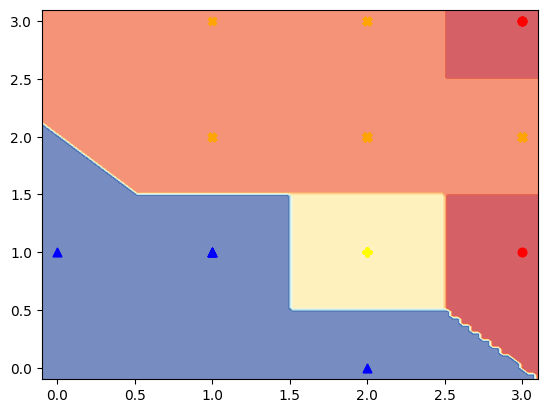

In [12]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[knn_model.predict(x) for x in x_in]]

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

knn_y_pred = np.array([knn_model.predict(x) for x in X_test_2d.values])

one = np.where(knn_y_pred == 1)
two = np.where(knn_y_pred == 2)
three = np.where(knn_y_pred == 3)
four = np.where(knn_y_pred == 4)
five = np.where(knn_y_pred == 5)
six = np.where(knn_y_pred == 6)

plt.scatter(data[one, 0], data[one, 1],
            color='red', marker='o', label='One')
plt.scatter(data[two, 0], data[two, 1],
            color='orange', marker='X', label='Two')
plt.scatter(data[three, 0], data[three, 1],
            color='yellow', marker='P', label='Three')
plt.scatter(data[four, 0], data[four, 1],
            color='cyan', marker='s', label='Four')
plt.scatter(data[five, 0], data[five, 1],
            color='blue', marker='^', label='Five')
plt.scatter(data[six, 0], data[six, 1],
            color='green', marker='D', label='Six')

plt.show()

# Plotting dmc decision surface

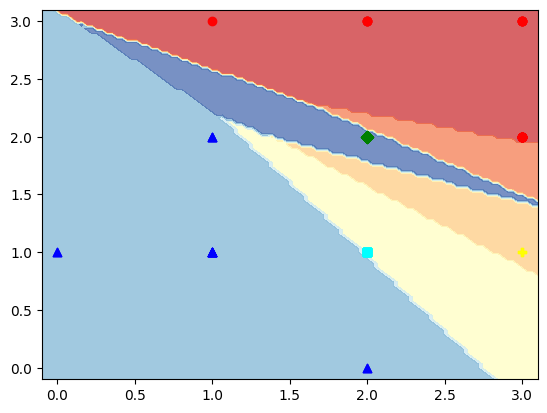

In [13]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[dmc_model.predict(x) for x in x_in]]

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

dmc_y_pred = np.array([dmc_model.predict(x) for x in X_test_2d.values])

one = np.where(dmc_y_pred == 1)
two = np.where(dmc_y_pred == 2)
three = np.where(dmc_y_pred == 3)
four = np.where(dmc_y_pred == 4)
five = np.where(dmc_y_pred == 5)
six = np.where(dmc_y_pred == 6)

plt.scatter(data[one, 0], data[one, 1],
            color='red', marker='o', label='One')
plt.scatter(data[two, 0], data[two, 1],
            color='orange', marker='X', label='Two')
plt.scatter(data[three, 0], data[three, 1],
            color='yellow', marker='P', label='Three')
plt.scatter(data[four, 0], data[four, 1],
            color='cyan', marker='s', label='Four')
plt.scatter(data[five, 0], data[five, 1],
            color='blue', marker='^', label='Five')
plt.scatter(data[six, 0], data[six, 1],
            color='green', marker='D', label='Six')

plt.show()

# Plotting bayes decision surface

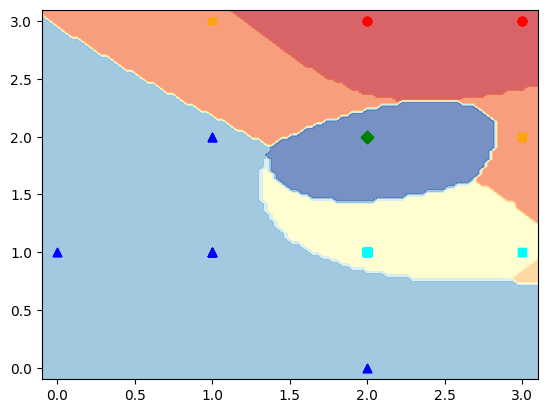

In [14]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[b_model.predict(x) for x in x_in]]

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

b_y_pred = np.array([b_model.predict(x) for x in X_test_2d.values])

one = np.where(b_y_pred == 1)
two = np.where(b_y_pred == 2)
three = np.where(b_y_pred == 3)
four = np.where(b_y_pred == 4)
five = np.where(b_y_pred == 5)
six = np.where(b_y_pred == 6)

plt.scatter(data[one, 0], data[one, 1],
            color='red', marker='o', label='One')
plt.scatter(data[two, 0], data[two, 1],
            color='orange', marker='X', label='Two')
plt.scatter(data[three, 0], data[three, 1],
            color='yellow', marker='P', label='Three')
plt.scatter(data[four, 0], data[four, 1],
            color='cyan', marker='s', label='Four')
plt.scatter(data[five, 0], data[five, 1],
            color='blue', marker='^', label='Five')
plt.scatter(data[six, 0], data[six, 1],
            color='green', marker='D', label='Six')

plt.show()